In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [3]:
data_dir = Path('D:\data\HMS')

spectro_dir = data_dir / 'train_spectrograms'
eeg_dir = data_dir / 'train_eegs'

data_dir, spectro_dir, eeg_dir

(WindowsPath('D:/data/HMS'),
 WindowsPath('D:/data/HMS/train_spectrograms'),
 WindowsPath('D:/data/HMS/train_eegs'))

In [4]:
# data_dir = 'D:\data\HMS'

# results_dir = f'{data_dir}/results'
# ckpt_path = f'{results_dir}/ckpt'

# spect_dir =  f'{data_dir}/train_spectrograms'

# ckpt_path, spect_dir

In [5]:
train_df = pd.read_csv(f'{data_dir}/train.csv')
train_df.columns

Index(['eeg_id', 'eeg_sub_id', 'eeg_label_offset_seconds', 'spectrogram_id',
       'spectrogram_sub_id', 'spectrogram_label_offset_seconds', 'label_id',
       'patient_id', 'expert_consensus', 'seizure_vote', 'lpd_vote',
       'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote'],
      dtype='object')

In [6]:
train_df.shape

(106800, 15)

In [7]:
train_df.sample(5)

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
80216,852583442,45,248.0,1624572100,45,248.0,2930529544,26411,GRDA,0,0,0,0,3,0
48678,810816348,5,24.0,945662643,5,24.0,1536505196,5099,Seizure,3,0,0,0,0,0
68513,1929473108,20,52.0,1377587203,20,52.0,1357547350,56885,LRDA,0,2,0,13,0,0
86402,1456815537,0,0.0,1769283280,38,430.0,2515849411,16920,Other,0,0,0,3,2,6
94685,496228904,40,164.0,1915717782,40,164.0,2622297835,38647,GRDA,0,0,0,0,10,6


### Consensus

C:\Users\rosul\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosul\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rosul\anaconda3\envs\pytorch\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


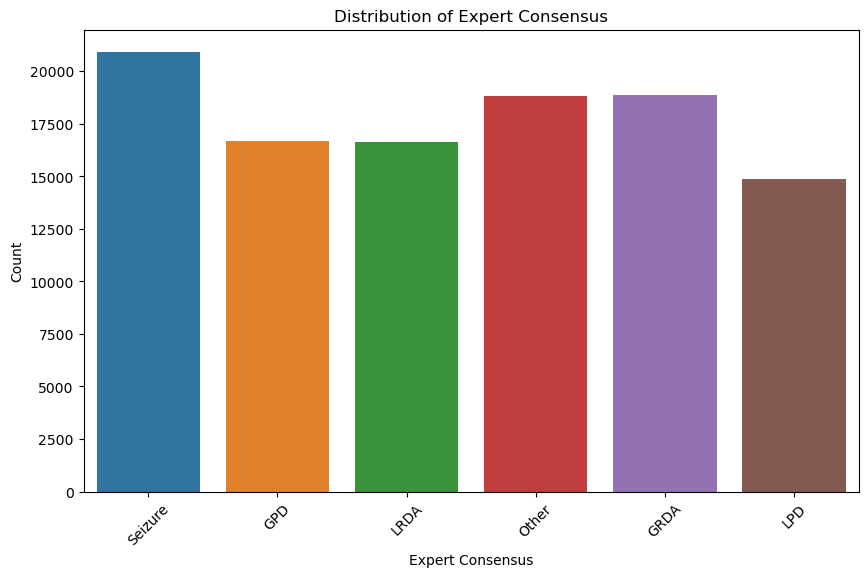

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='expert_consensus')
plt.title('Distribution of Expert Consensus')
plt.xlabel('Expert Consensus')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [9]:
vote_cols = [x for x in train_df.columns if 'vote' in x]
vote_cols

['seizure_vote',
 'lpd_vote',
 'gpd_vote',
 'lrda_vote',
 'grda_vote',
 'other_vote']

In [10]:
train_df['total_votes'] = train_df.loc[:, vote_cols].sum(axis=1)
train_df['cons_votes'] = train_df.loc[:, vote_cols].max(axis=1)

In [11]:
train_df['consensus'] = train_df['cons_votes']/train_df['total_votes']

<Axes: >

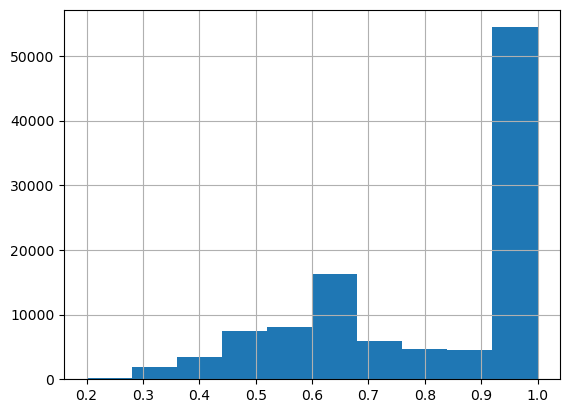

In [12]:
train_df['consensus'].hist()

In [13]:
train_df.loc[train_df['consensus'] > 0.9].shape[0]

54977

In [14]:
hi = train_df.loc[train_df['consensus'] > 0.9]['eeg_id'].nunique()
lo = train_df.loc[train_df['consensus'] < 0.9]['eeg_id'].nunique()

rate = hi/(hi+lo)

hi, lo, rate

(11063, 7160, 0.607089941282994)

### Check values

In [15]:
train_df.nunique()

eeg_id                               17089
eeg_sub_id                             743
eeg_label_offset_seconds              1502
spectrogram_id                       11138
spectrogram_sub_id                    1022
spectrogram_label_offset_seconds      4686
label_id                            106800
patient_id                            1950
expert_consensus                         6
seizure_vote                            18
lpd_vote                                19
gpd_vote                                17
lrda_vote                               16
grda_vote                               16
other_vote                              26
total_votes                             26
cons_votes                              25
consensus                              110
dtype: int64

In [16]:
train_df.sample(6)

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,total_votes,cons_votes,consensus
8337,1451703032,23,112.0,155584006,23,112.0,2945049802,51881,GRDA,0,0,0,0,3,0,3,3,1.000000
70547,2131412335,5,24.0,1408738063,5,24.0,1568398081,36024,Other,0,0,0,0,0,13,13,13,1.000000
60580,2909725313,0,0.0,1220301745,0,0.0,1797279085,17495,GRDA,0,0,0,0,3,0,3,3,1.000000
1639,2147351225,0,0.0,19126598,0,0.0,3982868315,8376,Other,0,0,0,0,0,2,2,2,1.000000
1633,2572382076,0,0.0,18821116,0,0.0,3518820182,14386,Other,0,0,0,0,4,9,13,9,0.692308
38665,1140647100,17,88.0,757048309,17,88.0,1772748955,51636,Seizure,3,0,0,0,0,0,3,3,1.000000


In [17]:
train_df.loc[train_df['eeg_id'] == 226568387]

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,total_votes,cons_votes,consensus
86502,226568387,0,0.0,1770232095,9,322.0,213920211,55021,LPD,0,1,0,0,0,1,2,1,0.500000
86503,226568387,1,20.0,1770232095,10,342.0,2112139894,55021,Other,0,5,0,0,0,8,13,8,0.615385
86504,226568387,2,28.0,1770232095,11,350.0,1919381241,55021,LPD,0,2,0,0,0,1,3,2,0.666667
86505,226568387,3,30.0,1770232095,12,352.0,2301321144,55021,LPD,0,2,0,0,0,1,3,2,0.666667
86506,226568387,4,32.0,1770232095,13,354.0,1400987221,55021,LPD,0,2,0,0,0,1,3,2,0.666667
86507,226568387,5,34.0,1770232095,14,356.0,1115903001,55021,LPD,0,2,0,0,0,1,3,2,0.666667
86508,226568387,6,36.0,1770232095,15,358.0,3353362484,55021,LPD,0,2,0,0,0,1,3,2,0.666667
86509,226568387,7,64.0,1770232095,16,386.0,2903936213,55021,Other,0,0,0,0,0,2,2,2,1.000000
86510,226568387,8,110.0,1770232095,17,432.0,3448514281,55021,Other,0,0,0,0,0,2,2,2,1.000000


In [18]:
train_df.loc[train_df['eeg_label_offset_seconds'] <= 0].shape[0], train_df.loc[train_df['eeg_label_offset_seconds'] > 0].shape[0]

(17089, 89711)

<Axes: >

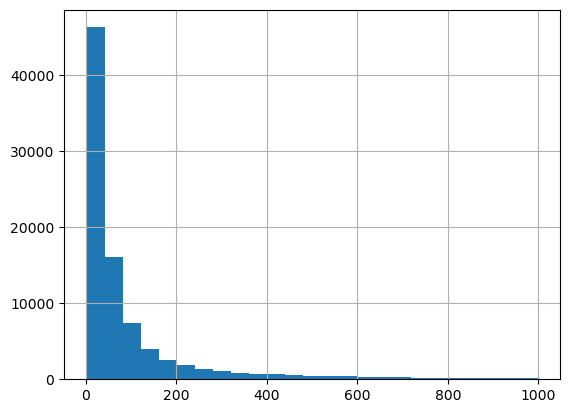

In [19]:
train_df.loc[(train_df['eeg_label_offset_seconds'] < 1000) & (train_df['eeg_label_offset_seconds'] > 0)].eeg_label_offset_seconds.hist(bins=25)

<Axes: >

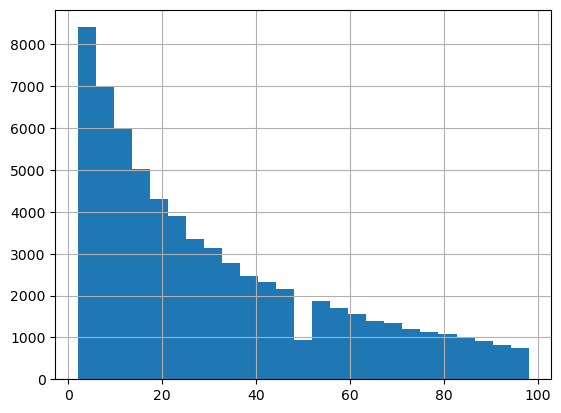

In [20]:
# train.eeg_label_offset_seconds.hist(bins=25)
train_df.loc[(train_df['eeg_label_offset_seconds'] < 100) & (train_df['eeg_label_offset_seconds'] > 0)].eeg_label_offset_seconds.hist(bins=25)

### Plots: EEG&Spectros

In [21]:
eeg_id = 2444120992
spectrogram_id = train_df[train_df['eeg_id'] == eeg_id].iloc[0].spectrogram_id
eeg_id, spectrogram_id

(2444120992, 1067639248)

In [22]:
eeg = pd.read_parquet(f'{eeg_dir}/{eeg_id}.parquet')
spectro = pd.read_parquet(f'{spectro_dir}/{spectrogram_id}.parquet')
# print(eeg.shape)
print(spectro.shape)

(306, 401)


In [23]:
np.sort(eeg.columns)

array(['C3', 'C4', 'Cz', 'EKG', 'F3', 'F4', 'F7', 'F8', 'Fp1', 'Fp2',
       'Fz', 'O1', 'O2', 'P3', 'P4', 'Pz', 'T3', 'T4', 'T5', 'T6'],
      dtype=object)

In [24]:
eeg.iloc[:20]

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
0,-32.430000,5.32,20.469999,14.890000,7.710000,244.309998,34.560001,30.309999,-13.03,-7.71,5.320000,-72.040001,-72.040001,-64.860001,-43.070000,-64.070000,-32.700001,-41.200001,-10.630000,34.029999
1,-22.860001,8.24,21.000000,14.890000,11.960000,247.759995,37.480000,33.230000,-12.76,-7.18,1.600000,-69.120003,-68.320000,-57.160000,-31.629999,-59.279999,-24.190001,-31.370001,-3.990000,53.430000
2,-28.709999,17.01,33.230000,21.270000,21.270000,253.880005,41.740002,41.200001,-1.06,9.57,17.280001,-62.209999,-57.419998,-48.119999,-18.080000,-45.990002,-15.950000,-19.410000,10.100000,32.169998
3,-45.189999,-0.80,13.030000,-5.050000,0.270000,231.809998,19.940001,14.890000,-12.23,-3.19,4.520000,-74.430000,-66.459999,-51.310001,-39.880001,-65.400002,-31.629999,-39.880001,-12.760000,30.830000
4,-45.459999,3.99,7.440000,-11.170000,-1.060000,230.479996,16.750000,9.300000,-14.62,-10.37,-5.580000,-75.760002,-66.730003,-47.849998,-38.549999,-65.660004,-26.049999,-40.410000,-15.680000,45.189999
5,-42.000000,15.15,28.440001,9.040000,19.410000,247.759995,32.430000,30.840000,-1.86,9.04,11.700000,-64.070000,-56.619999,-43.330002,-14.890000,-47.849998,-9.840000,-16.750000,7.180000,34.299999
6,-43.599998,8.51,24.459999,-2.130000,12.760000,239.789993,23.129999,19.940001,-5.05,9.30,11.170000,-65.400002,-59.020000,-49.709999,-27.650000,-52.900002,-18.080000,-25.790001,-0.800000,14.360000
7,-33.230000,0.00,9.300000,-17.280001,3.460000,231.809998,11.430000,5.320000,-14.36,-9.30,-7.710000,-68.589996,-66.190002,-55.830002,-41.200001,-60.610001,-22.600000,-38.810001,-15.680000,36.950001
8,-23.389999,10.90,22.330000,-1.330000,17.549999,246.169998,28.180000,23.129999,-3.46,1.60,-0.800000,-56.889999,-53.430000,-48.380001,-18.610001,-43.860001,-6.650000,-15.680000,4.520000,60.349998
9,-28.709999,13.03,21.799999,-4.790000,19.139999,241.910004,24.990000,18.610001,0.80,5.32,5.320000,-56.360001,-50.509998,-49.450001,-21.530001,-45.189999,-9.840000,-19.410000,2.920000,9.570000


In [25]:
spectro.iloc[:,:101]

,time,LL_0.59,LL_0.78,LL_0.98,LL_1.17,LL_1.37,LL_1.56,LL_1.76,LL_1.95,LL_2.15,...,LL_18.16,LL_18.36,LL_18.55,LL_18.75,LL_18.95,LL_19.14,LL_19.34,LL_19.53,LL_19.73,LL_19.92
0,1,13.780000,20.969999,19.469999,14.730000,11.500000,5.920000,5.270000,5.08,3.80,...,0.03,0.03,0.03,0.02,0.02,0.02,0.02,0.11,0.29,0.29
1,3,38.060001,41.459999,37.660000,28.660000,19.690001,13.890000,8.840000,5.10,3.46,...,0.04,0.04,0.04,0.02,0.03,0.03,0.02,0.07,0.28,0.27
2,5,41.160000,42.380001,37.450001,24.290001,16.889999,14.700000,9.440000,5.77,6.34,...,0.04,0.03,0.05,0.03,0.03,0.03,0.02,0.06,0.22,0.22
3,7,28.150000,32.389999,37.790001,35.700001,28.270000,22.959999,13.830000,10.64,7.14,...,0.04,0.02,0.02,0.02,0.02,0.03,0.02,0.06,0.22,0.21
4,9,27.740000,31.400000,44.200001,21.469999,31.900000,20.830000,16.629999,12.89,4.81,...,0.02,0.02,0.02,0.02,0.01,0.02,0.02,0.05,0.23,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,603,22.740000,28.900000,33.400002,27.799999,23.740000,17.480000,15.590000,15.52,9.84,...,0.04,0.04,0.04,0.04,0.03,0.04,0.03,0.07,0.18,0.19
302,605,12.350000,19.000000,24.420000,34.130001,30.379999,32.700001,25.500000,15.11,8.95,...,0.06,0.05,0.04,0.06,0.05,0.05,0.06,0.08,0.19,0.17
303,607,26.540001,36.849998,48.380001,55.900002,51.110001,33.430000,31.969999,13.94,12.06,...,0.05,0.05,0.05,0.05,0.04,0.04,0.03,0.07,0.17,0.16
304,609,29.459999,39.580002,51.840000,49.759998,37.130001,20.980000,10.420000,11.79,11.84,...,0.07,0.05,0.04,0.04,0.03,0.03,0.04,0.06,0.21,0.20
